
<font size = "5"> **Chapter 4: [Spectroscopy](CH4_00-Spectroscopy.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />



# Introduction to  Electron Energy-Loss Spectroscopy


[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM/main/Spectroscopy/CH4_01-Introduction.ipynb)

part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2024

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


## Preliminaries
### Check Installed Packages

In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.2.3':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

installing pyTEMlib
done


### Import all relevant libraries

Please note that the EELS_tools package from pyTEMlib is essential.

In [21]:
import sys
%matplotlib ipympl
if 'google.colab' in sys.modules:
    from google.colab import output
    from google.colab import drive
    output.enable_custom_widget_manager()

import matplotlib.pylab as plt
import numpy as np
    
# Import libraries from the book
import pyTEMlib
from pyTEMlib import file_tools           # File input/ output library
from pyTEMlib import eels_tools  

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

pyTEM version:  0.2024.02.2


## Introduction

### Parts of an EELS Spectrum:


![EELS spectrum](images/EELS.jpg "Title")


**No energy transfer**

The zero--loss peak is caused by electrons of the acceleration energy which apparently did not loose any energy (or only a tiny amount in a quasi--elastic scattering). 

**Little energy transfer: 1-70 eV**

The valence--loss region shows intraband, interband, and plasmon  transitions.

**High energy transfer: above 70eV**

The core--loss region contains excitation from the atom core levels into the conduction band appear as saw tooth like edges.


### Inelastic Excitation
Energy is transfered to an atom in ground state and after a while (femto seconds) this atoms will change its electron levels and shell occupations and becomes an excited atom.


<img title="inelastic excitation" width="50%" alt="inelastic excitation" src="images/inelastic2.jpg">


After some time (femto seconds to minutes) this atoms falls back to the ground state and after a little while longer (femto seconds), the atom emits this energy either in form of photons (in the light and  X-ray spectrum)  or Auger electron. 


So we have two obervable processes:

**energy transfer to the atom in ground state**
- primary energy transfer
       - electron energy-loss spectroscopy

**excited atom emitting energy**
- secondary processes
       - electron energy-loss spectroscopy
       - Auger spectroscopy
       - energy-dispersive X-ray spectroscopy
       - Cathodoluminescence
  

### EELS Spectrometer

We use a magnetic field to bend the electron beam (here 90$^{\rm o}$) which acts like a prism for light and separates the electrons by spead (kinetic energy). The faster electrons will get bent less. 

<img title="EELS spectrometer" width="50%" alt="EELS spectrometer and prism" src="images/EELS_Spectrometer.jpg">

With such a prism for electrons we can determine the energy lost in the sample. 



### EELS and STEM

The advantage of EELS in STEM mode is that we get a HAADF signal and the bright field signal is analysed with EELS spectroscopy. So we get spatially resolved image and chemical information simultaneously.

<img title="EELS and STEM" width="50%" alt="EELS and STEM" src="images/Z-Contrast.jpg">

## Load an EELS Spectrum


In [22]:
# ---- Input ------
load_example = True
# -----------------
if not load_example:
    if 'google.colab' in sys.modules:
        drive.mount("/content/drive")

    fileWidget = file_tools.FileWidget()

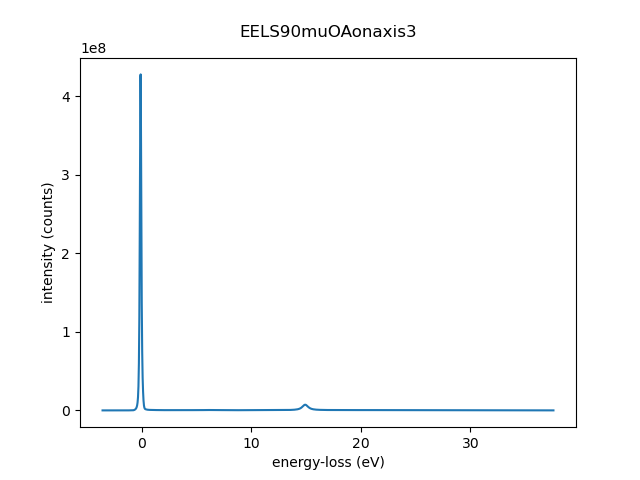

In [23]:
# ---- Input ------
load_example = True
file_name = 'AL-DFoffset0.00.dm3'
# -----------------
if load_example:
    if 'google.colab' in sys.modules:
      if not os.path.exists('./'+file_name):
        !wget  https://github.com/gduscher/MSE672-Introduction-to-TEM/raw/main/example_data/AL-DFoffset0.00.dm3
    else:
        datasets = file_tools.open_file('../example_data/'+file_name)
        eels_dataset = datasets['Channel_000']
      
else:
    datasets = fileWidget.datasets
    eels_dataset = fileWidget.selected_dataset
    
view = eels_dataset.plot()

### Important Parameters in an EELS spectrum

A lot of information is stored in the ``original_metadata``. 

We will learn in this ``Spectroscopy`` section of the lecture which ones are absolutely necessary. 

In [24]:
eels_dataset.view_original_metadata()

ImageData :
	Calibrations :
		Brightness :
			Origin : 0.0
			Scale : 1.0
			Units : Counts
		Dimension :
			0 :
				Origin : 179.33062744140625
				Scale : 0.0201262179762125
				Units : eV
		DisplayCalibratedUnits : 1
	Data : read
	DataType : 2
	Dimensions :
		0 : 2048
	PixelDepth : 4
ImageTags :
	Acquisition :
		Device :
			Active Size (pixels) : [2048, 2048]
			Camera Number : 0
			CCD :
				Pixel Size (um) : [14.0, 14.0]
			Configuration :
				Transpose :
					Diagonal Flip : 0
					Horizontal Flip : 1
					Vertical Flip : 0
			Name : US1000XP 1
			Source : US1000XP 1
		Frame :
			Area :
				Transform :
					Class Name : cm_acquisitiontransform_list
					Transform List :
						0 :
							Binning : [1, 1]
							Class Name : cm_acquisitiontransform
							Sub Area Adjust : [0, 0, 0, 0]
							Transpose :
								Diagonal Flip : 0
								Horizontal Flip : 1
								Vertical Flip : 0
			CCD :
				Pixel Size (um) : [14.0, 14.0]
			Intensity :
				Transform :
					Class Name : cm_valu

The information is contained in a python dictionary and we will have to data mine this information to get the experimental conditions.

In [25]:
for key in eels_dataset.original_metadata:
    print(key)
print()
print(" Dictionary: original_metadata['ImageList']['1']['ImageTags']['EELS']['Acquisition'] ")
for key, item  in eels_dataset.original_metadata['ImageTags']['EELS']['Acquisition'].items():
    print(key, item)

ImageData
ImageTags
Name
UniqueID
DM
original_filename
ApplicationBounds
DocumentObjectList
DocumentTags
HasWindowPosition
Image Behavior
ImageSourceList
InImageMode
MinVersionList
NextDocumentObjectID
Page Behavior
PageSetup
SentinelList
Thumbnails
WindowPosition

 Dictionary: original_metadata['ImageList']['1']['ImageTags']['EELS']['Acquisition'] 
Continuous mode 0
Date 10/1/2018
End time 11:12:22 AM
Exposure (s) 0.1
Integration time (s) 10.0
Number of frames 100
Saturation fraction 0.7989057898521423
Start time 11:10:22 AM


Of course there is a function for this (in pyTEMlib.eels_tools).

In [26]:
eels_dataset.view_metadata()

experiment :
	single_exposure_time : 0.1
	exposure_time : 10.0
	number_of_frames : 100
	collection_angle : 100.0
	convergence_angle : 0.0
	microscope : Libra 200 MC
	acceleration_voltage : 199990.28125


### Make Energy Scale andPlot

The energy scale above is linear and so a linear increasing numpy array (of size *eels_dataset.shape[0]*)  is multiplied with the channel width (*sipersion*), the first channel is in the variable *offset*.

Dispersion [eV/pixel] : 0.02 eV 
Offset [eV] : -3.61 eV 
Maximum energy [eV] : 37.59 eV 


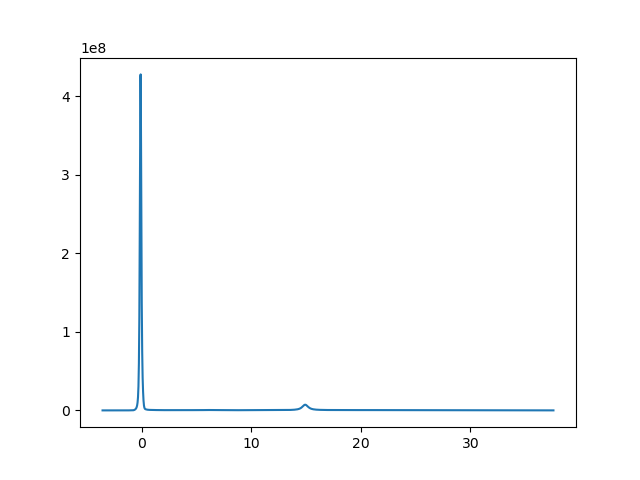

In [29]:
print(f"Dispersion [eV/pixel] : {ft.get_slope(eels_dataset.energy_loss):.2f} eV ")
print(f"Offset [eV] : {eels_dataset.energy_loss[0]:.2f} eV ")
print(f"Maximum energy [eV] : {eels_dataset.energy_loss[-1]:.2f} eV ")

energy_scale = np.arange(eels_dataset.shape[0])

dispersion = ft.get_slope(eels_dataset.energy_loss)
energy_scale = energy_scale * dispersion

offset = eels_dataset.energy_loss[0]
energy_scale = energy_scale + offset

plt.figure()
plt.plot(energy_scale, eels_dataset);


Let's compare the keys in the current_channel and  in the dictionary 

### Normalizing Intensity Scale
The following normalization makes only sense if this is a low loss spectrum, <br> where the total number of counts represents approximatively the incident current **$I_0$**

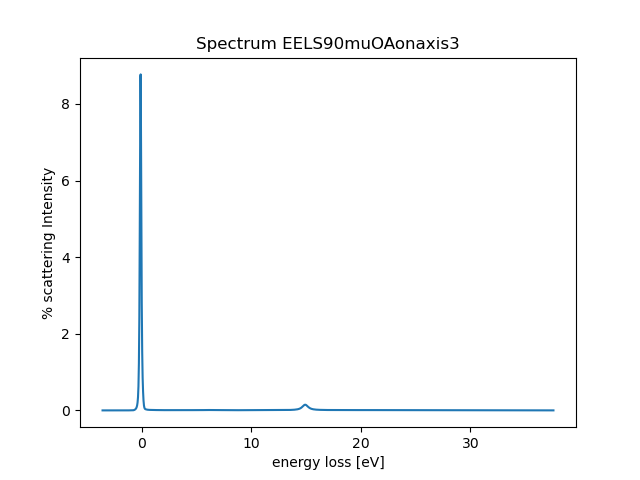

In [30]:
I_0 = sumSpec = float(np.sum(np.array(eels_dataset)))
plt.figure()
plt.plot(energy_scale,eels_dataset/sumSpec*1e2)
plt.title ('Spectrum '+eels_dataset.title);
plt.xlabel('energy loss [eV]')
plt.ylabel('% scattering Intensity');
#plt.xlim(-10,50)
#plt.ylim(0,8);


## Summary
The metadata are as important as the values of a spectrum.

Make sure all metadata are saved, whcih ususally means to store data in the proprietary format of the software used.

## Navigation
- <font size = "3">  **Up Chapter 4: [Imaging](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **Back: [Overview](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **Next:  [Fit Zero-Loss](CH4_02-Fit_Zero_Loss.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>
